<a href="https://colab.research.google.com/github/RahulReadd/Computer_Vision_Projects-/blob/main/Hand_Written_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision

## MNIST Digit Classification


In [1]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## 1.1 MNIST dataset 

Download and load the dataset and display a few random samples from it:

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11490434/11490434 [==============================] - 2s 0us/step


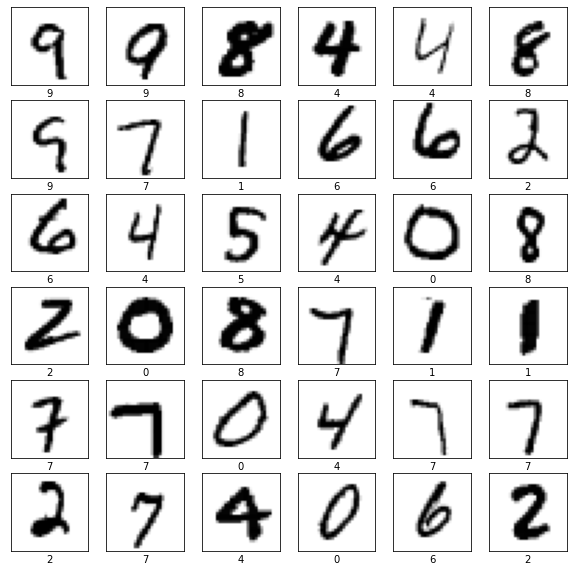

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [4]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation= "sigmoid"),
      tf.keras.layers.Dense(10, activation = 'softmax')
      
  ])
  return fc_model

model = build_fc_model()

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 5s 3ms/step - loss: 0.7097 - accuracy: 0.8286
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3524 - accuracy: 0.9011
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3068 - accuracy: 0.9116
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.2801 - accuracy: 0.9197
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 0.2603 - accuracy: 0.9249


In [7]:

test_loss, test_acc = model.evaluate(test_images,test_labels)# TODO

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2437 - accuracy: 0.9318
Test accuracy: 0.9318000078201294


In [ ]:
train_images.shape

(60000, 28, 28, 1)

Convolutional Neural Network (CNN) for handwritten digit classification



![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/convnet_fig.png "CNN Architecture for MNIST Classification")

### Define the CNN model


In [8]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)), 
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPool2D((2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        tf.keras.layers.Dense(10,activation = 'softmax' )
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()

cnn_model.predict(train_images[[0]])

print(cnn_model.summary())

1/1 [==============================] - 5s 5s/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 den

In [9]:
cnn_model.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate = 0.002, beta_1 = 0.9, beta_2 = 0.999), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 

In [10]:
cnn_model.fit(train_images, train_labels, batch_size = 64, epochs = 10)

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.1813 - accuracy: 0.9457
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0632 - accuracy: 0.9803
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0450 - accuracy: 0.9863
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0344 - accuracy: 0.9891
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0264 - accuracy: 0.9920
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0172 - accuracy: 0.9948
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0142 - accuracy: 0.9955
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0111 - accuracy: 0.9965
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0090 - accuracy: 0.9973

In [15]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9907
Test accuracy: 0.9907000064849854


In [16]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [17]:
predictions[0]

array([3.6908441e-09, 7.3491668e-10, 1.3870000e-07, 5.3719242e-07,
       3.6657752e-10, 1.2100208e-10, 1.2387078e-15, 9.9999928e-01,
       3.1645985e-08, 1.4510351e-08], dtype=float32)

In [18]:
prediction =  np.argmax(predictions[0])

print(prediction)

7


Label of this digit is: 7


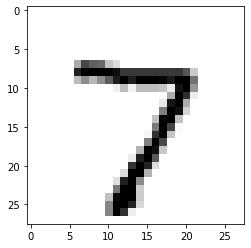

In [13]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)